# Distance Between Two Random Points In A Square

Inspired from https://mindyourdecisions.com/blog/2016/07/03/distance-between-two-random-points-in-a-square-sunday-puzzle/.

What is the average distance between two randomly chosen points in a square with a side length 1?

Specifically, select two points at random (drawn from the standard uniform distribution) from the interior of the unit square. What is the mean distance between the two random points?

This problem has an exact solution but we don't want to invest time in it. Let's just dive into code !

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Distance between two random points in the unit square

**Q1** - Build a function which takes as input a number $s$ of randomly selected pair of points $\{(x_{1}, y_{1}); (x_{2}, y_{2})\}$ in the unit square and outputs a vector of size $s$ containing the distance between the points in a pair.

```python
def distance(s):
```

In [2]:
def distance(s):
    x1 = np.random.rand(s)
    y1 = np.random.rand(s)
    x2 = np.random.rand(s)
    y2 = np.random.rand(s)
    return np.sqrt(np.power((x2-x1), 2) + np.power((y2-y1), 2))

**Q2** - Return the mean distance of a number $s$ of randomly selected pair of points $\{(x_{1}, y_{1}); (x_{2}, y_{2})\}$


```python
def meanDistance(s):
```

In [3]:
def meanDistance(s):
    return np.mean(distance(s))

**Q3** - Plot the evolution of the mean and variance of the distance of $s$ randomly selected pair of points, when $s$ grows.

Comment

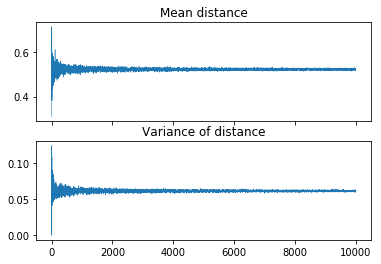

In [4]:
def plotDistance(end):
    x = np.arange(1, end)
    mean = [meanDistance(s) for s in x]
    var = [np.var(distance(s)) for s in x]
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(x, mean, linewidth=0.5)
    ax2.plot(x, var, linewidth=0.5)
    ax1.set_title('Mean distance')
    ax2.set_title('Variance of distance')
    
    plt.show()
    
    
plotDistance(10000)

* It looks like the average distance of 2 randomly selected points converges to about 0.52
* Variance of the distance converges too

**Q4** - Plot the distribution of distances for randomly selected points in the unit square (for a large sample $s$ of randomly selected points).

Comment on the shape of the distribution, notably compared to the average value for distance after it has converged.

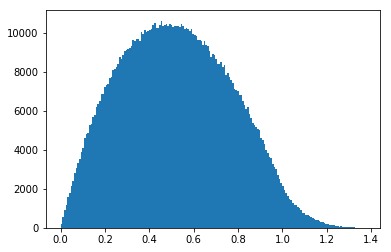

In [5]:
def plotDistribution(s):
    x1 = np.random.rand(s)
    y1 = np.random.rand(s)
    x2 = np.random.rand(s)
    y2 = np.random.rand(s)
    plt.hist(np.sqrt(np.power((x2-x1), 2) + np.power((y2-y1), 2)), bins='auto')
    
plotDistribution(1000000)

## 2. Distance between a random point and a fixed point in the unit square

**Q5** -  Build a function which takes as input a number  $s$  of randomly selected points $\{(x2,y2)\}$, and the coordinates for a fixed point all in the unit square and outputs the mean distance between the fixed point and all randomly positioned points.

```python
def distanceFixPoint(s, x1, y1):
```

In [6]:
def distanceFixPoint(s, x1, y1):
    x2 = np.random.rand(s)
    y2 = np.random.rand(s)
    return np.sqrt(np.power((x2-x1), 2) + np.power((y2-y1), 2))

**Q6** - Plot the evolution of the average distance between some fixed points and randomly selected points

In [7]:
def plotDistanceFixPoint(end, x1, y1):
    x = np.arange(1, end)
    y = [np.mean(distanceFixPoint(s, x1, y1)) for s in x]
    plt.plot(x, y, linewidth=0.5)

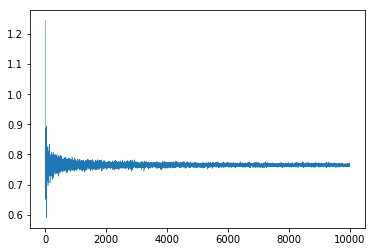

In [8]:
plotDistanceFixPoint(10000, 0, 0)

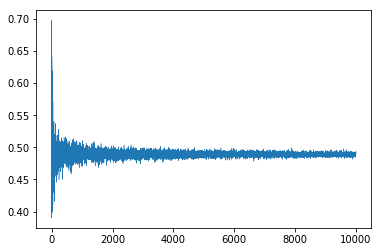

In [9]:
plotDistanceFixPoint(10000, 0.25, 0.25)

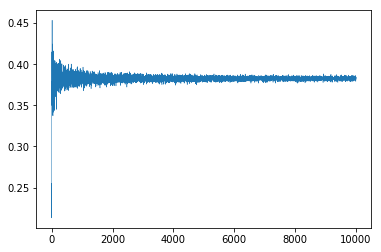

In [10]:
plotDistanceFixPoint(10000, 0.5, 0.5)

**Q7** - Consider the fix point is travelling along the diagonal of the unit square, plot the evolution of the average distance between the fixed point on the diagonal and randomly selected points (for a large sample $s$ of randomly selected points).

Comment on the curve.

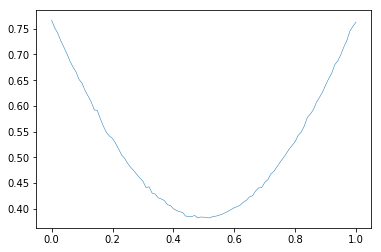

In [11]:
def plotDistanceFixPointOnDiagonal(s, res):
    xt = np.arange(0, 1 + res, res)
    yt = [np.mean(distanceFixPoint(s, t, t)) for t in xt]
    plt.plot(xt, yt, linewidth=0.5)
    
plotDistanceFixPointOnDiagonal(10000, 0.01)

* This looks good, this means the center of the square has the minimum average distance to a random point in the unit square which is totally plausible. Same goes for borders.
* Symmetry --> we should probably admit the part from center to high-right is representative

**Q8** - Using symmetry and rotation arguments, it should be clear that we can study the distance between a fixed point in the triangle with corners *{center of triangle, upper right of triangle, center of rightmost segment}* and random points in the unit square.

Plot the evolution of the average distance between the fixed point travelling on the triangle and randomly selected points in the unit square (for a large sample $s$ of randomly selected points).

In [12]:
None

## 3. Higher dimensions

**Q9** - Fix the sample size $s$ to a large number and plot the evolution of the average and variance distance between 2 random points inside a unit hypercube of dimension $n$, with $n$ growing.

Comment on the result.

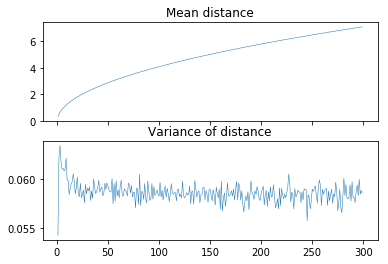

In [16]:
def distanceND(s, dim):
    first = np.random.rand(s, dim)
    second = np.random.rand(s, dim)
    return np.sqrt(np.sum(np.power(first - second, 2), axis=1))

def plotND(s, endDim):
    dimensions = np.arange(1, endDim)
    
    mean = [np.mean(distanceND(s, dim)) for dim in dimensions]
    var = [np.var(distanceND(s, dim)) for dim in dimensions]
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(dimensions, mean, linewidth=0.5)
    ax2.plot(dimensions, var, linewidth=0.5)
    ax1.set_title('Mean distance')
    ax2.set_title('Variance of distance')
    
    plt.show()
        
plotND(10000, 300)

* Curse of dimensionality xD


**Q10** - Same as Q9, but plot the evolution of the ratio between the average distance at dimension N and the length of the diagonal of the unit hypercube of dimension N.

Comment.

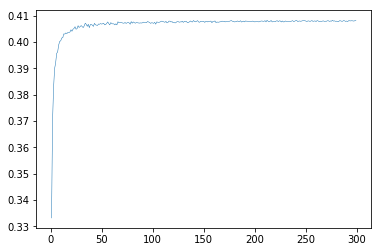

In [14]:
def lengthDiagonal(dim):
    one = np.ones(dim)
    return np.sqrt(dim)

def distanceNDRatio(s, dim):
    first = np.random.rand(s, dim)
    second = np.random.rand(s, dim)
    return np.sqrt(np.sum(np.power(first - second, 2), axis=1))

def plotNDRatio(s, endDim):
    dimensions = np.arange(1, endDim)
    distance = [np.mean(distanceND(s, dim)) / lengthDiagonal(dim) for dim in dimensions]
    plt.plot(dimensions, distance, linewidth=0.5)

plotNDRatio(10000, 300)

Other links :
* http://mathworld.wolfram.com/HypercubeLinePicking.html
* https://math.stackexchange.com/questions/1976842/how-is-the-distance-of-two-random-points-in-a-unit-hypercube-distributed
* https://martin-thoma.com/average-distance-of-points/